# Modules

In [ ]:
import re
import pandas as pd
import matplotlib.pyplot as plt
import emojis

# Preprocessing

In [ ]:
def istime(s):
    pattern = '^([0-9]+)/([0-9]+)/([0-9]+), ([0-9]+):([0-9]+)[ ]?' 
    result = re.match(pattern, s)
    if result:
        return True
    return False

def isNotif(m):
    if len(m.split(": ")) >=2:
        return True
    return False

def get_slice_data(s):
    Line = s.split(' - ') 
    dateTime = Line[0]
    date, time = dateTime.split(', ') 
    message = ' '.join(Line[1:])
    if isNotif(message):
        splitMessage = message.split(':') 
        name = splitMessage[0] 
        message = ' '.join(splitMessage[1:])
    else:
        name = "Notifications"
        

    return date, time, name, message


In [ ]:
raw_data = open("test.txt","r")
raw_data = raw_data.read().replace("\u202f", " ").split("\n")

lindata= []
buff = ""

for lin in raw_data:
    if istime(lin):
        lindata.append(buff)
        buff = ""
    buff += lin
    #print(istime(lin))

lindata = lindata[1:]
#lindata

In [140]:
data=dict()
data["Date"] = []
data["Time"] = []
data["Name"] = []
data["Message"] = []

for lin in lindata:
    date, time, name, message = get_slice_data(lin)
    data["Date"].append(date)
    data["Time"].append(time)
    data["Name"].append(name)
    data["Message"].append(message)
#data
df = pd.DataFrame(data,columns=['Date', 'Time', 'Name', 'Message'])
df[100:200]
    

,Date,Time,Name,Message
100,10/10/22,7:34 pm,Teja,https //eeho.fa.us2.oraclecloud.com/hcmUI/Can...
101,12/10/22,12:18 pm,Teja,<Media omitted>
102,12/10/22,12:20 pm,Ravi Teja,Syllabus aq?
103,12/10/22,12:56 pm,Teja,Yes
104,12/10/22,3:39 pm,Teja,https //youtube.com/shorts/gV6CCD95-X8?featur...
...,...,...,...,...
195,04/11/22,8:25 am,Abhay,<Media omitted>
196,04/11/22,9:35 am,Vamsi,https //5movierulz.cm/brahmastram-part-one-sh...
197,05/11/22,9:14 am,Ravi Teja,11th wakanda forever
198,05/11/22,9:46 am,Teja,I am in..


In [144]:
df["Date"] = pd.to_datetime(df["Date"])

In [142]:
df['Time'] = pd.to_datetime(df['Time'], format='%I:%M %p').dt.time

In [143]:
people = list(set(data["Name"]))
people.pop(people.index("Notifications"))
people

['Abhay', 'praneeth', 'Ram Raj', 'Ravi Varma', 'Vamsi', 'Ravi Teja', 'Teja']

In [ ]:
x=people
y=[]
for i in x:
    y.append(df[df["Name"] == i].shape[0])


In [ ]:
def show_graphs(x,y):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

    ax1.pie(y, labels=x, autopct='%1.1f%%', startangle=90)
    ax1.set_title('Pie Chart')

    ax2.bar(x, y, color=['blue', 'green', 'red', 'purple'])
    ax2.set_title('Bar Chart')

    plt.tight_layout()
    plt.show()


In [ ]:
show_graphs(x,y)

In [ ]:
media_count = dict()
media_raw = list(df[df["Message"]==" <Media omitted>"]["Name"])
for i in people:
    media_count[i]=media_raw.count(i)
media_count

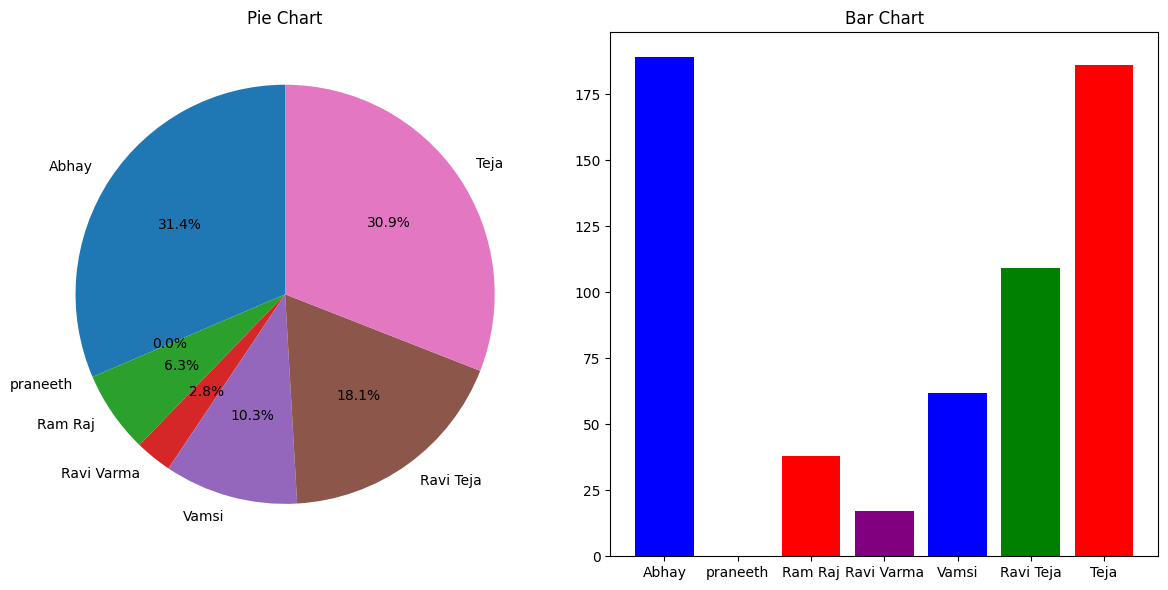

In [88]:
show_graphs(media_count.keys(),media_count.values())

In [183]:
time_msg_count = dict()
media_raw = list(df[df["Message"]==" <Media omitted>"]["Name"])
for i in people:
    media_count[i]=media_raw.count(i)
media_count

df[(df["Time"] > pd.to_datetime("9:00 pm").time()) & (df["Time"] < pd.to_datetime("10:00 pm").time())]["Name"]

0       Notifications
1       Notifications
2       Notifications
3       Notifications
4       Notifications
            ...      
3105          Ram Raj
3106            Abhay
3126            Abhay
3139            Abhay
3143             Teja
Name: Name, Length: 729, dtype: object

,Date,Time,Name,Message
0,2022-08-21,9:23 pm,Notifications,Messages and calls are end-to-end encrypted. N...
1,2022-08-21,9:23 pm,Notifications,"Abhay created group ""Name mere decide cheyandi"""
2,2022-08-21,9:23 pm,Notifications,Abhay added you
3,2022-08-21,9:23 pm,Notifications,You're now an admin
4,2022-08-21,9:28 pm,Notifications,"Vamsi changed the group name from ""Name mere d..."
...,...,...,...,...
3148,2024-09-14,3:06 pm,Ram Raj,Game??
3149,2024-09-14,8:55 pm,Abhay,Game
3150,2024-09-15,1:38 pm,Abhay,Game
3151,2024-09-15,2:20 pm,Ram Raj,Playing?


In [161]:
pd.to_datetime("9:20 pm").time()

datetime.time(21, 20)

In [159]:
dir(df["Time"]).time

AttributeError: 'list' object has no attribute 'time'